[2400.         2353.1672877  2308.12734443 ...   12.00238871   12.00119424
   12.        ]
Significant peaks:
Period: 12.03 hours, Power: 0.00


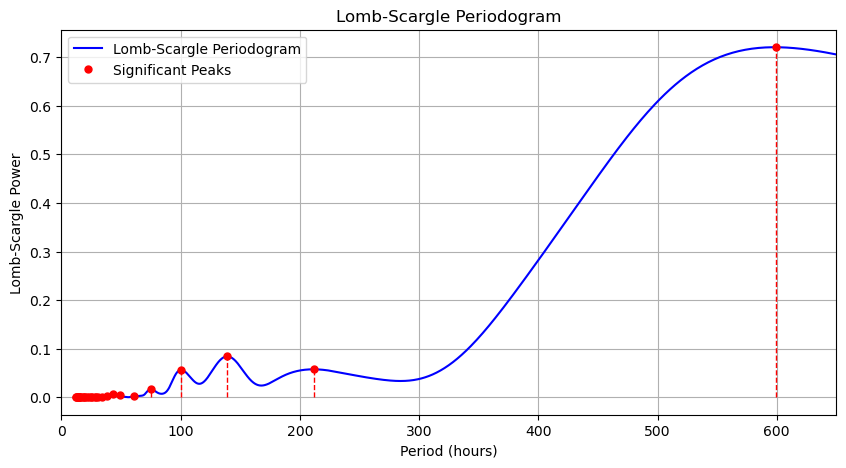

[0.62249506 0.62250664 0.62251824 ... 0.66623238 0.66624396 0.66625556]


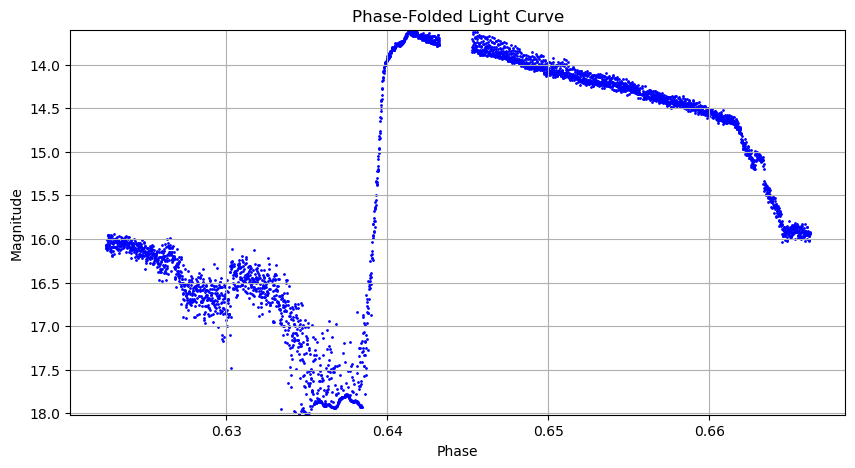

In [22]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks


def analyze_txt_file(file_path):
    
    data = np.loadtxt(file_path)

    
    time = data[:, 1]  
    magnitude = data[:, 4] 

    ls = LombScargle(time, magnitude)

    cadence = 0.5

    try:
        cadence_hours = float(cadence)
        if cadence_hours <= 0:
            raise ValueError("Invalid cadence value. Cadence must be greater than 0.")
    except ValueError:
        print("Invalid input for cadence. Please enter a valid numeric value.")
        return

    max_frequency = 1 / cadence_hours
    frequency = np.linspace(0.01, max_frequency, 10000)
    power = ls.power(frequency, normalization='standard')  
    period = 24 / frequency  
    print(period)
   
    plt.figure(figsize=(10, 5))
    plt.plot(period, power, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (hours)')
    plt.ylabel('Lomb-Scargle Power')
    plt.xlim(0, 650)  
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)
    
    
    peaks, _ = find_peaks(power, height=0)
    print("Significant peaks:")
    for peak_index in peaks:
     peak_period = period[peak_index]
    peak_power = power[peak_index]
    print(f"Period: {peak_period:.2f} hours, Power: {peak_power:.2f}")

    peaks, _ = find_peaks(power, height=0)
    plt.plot(period[peaks], power[peaks], 'ro', markersize=5, label='Significant Peaks')
    
    for peak_index in peaks:
        plt.plot([period[peak_index], period[peak_index]], [0, power[peak_index]], 'r--', linewidth=1)

    plt.legend()  
    plt.show()

    if len(peaks) > 0:
        # Take the most significant peak for phase folding
        significant_peak_index = peaks[np.argmax(power[peaks])]
        peak_period = period[significant_peak_index]

        phi = (time / peak_period) % 1
        print(phi)
        plt.figure(figsize=(10, 5))
        plt.scatter(phi, magnitude, color='blue', s=1)
        plt.xlabel('Phase')
        plt.ylabel('Magnitude')
        plt.title('Phase-Folded Light Curve')
        plt.ylim(max(magnitude), min(magnitude))
        plt.grid(True)
        plt.show()
    else:
        print("No significant peaks found.")

file_path = r"c:\Users\eitan\code repos\data\extracted tarballs\sector54\lc_2022pix_cleaned.txt"

if os.path.exists(file_path):
    analyze_txt_file(file_path)
else:
    print("File not found. Please make sure the file path is correct and the file exists.")

  
    


Best period: 0.17 hours


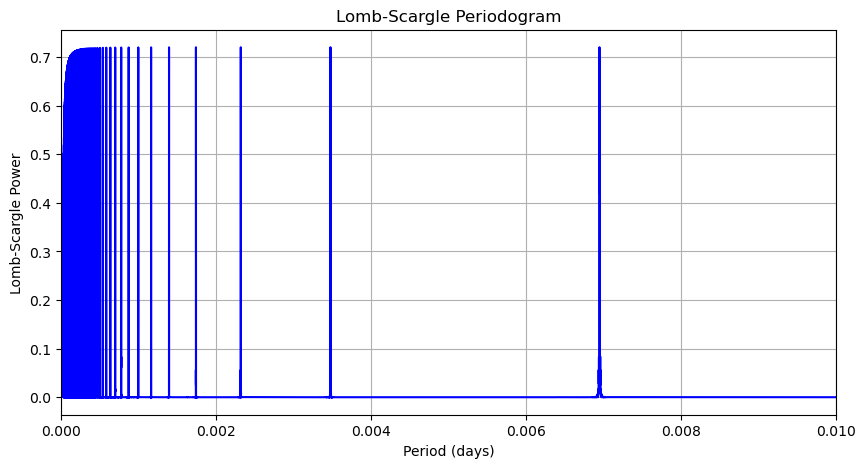

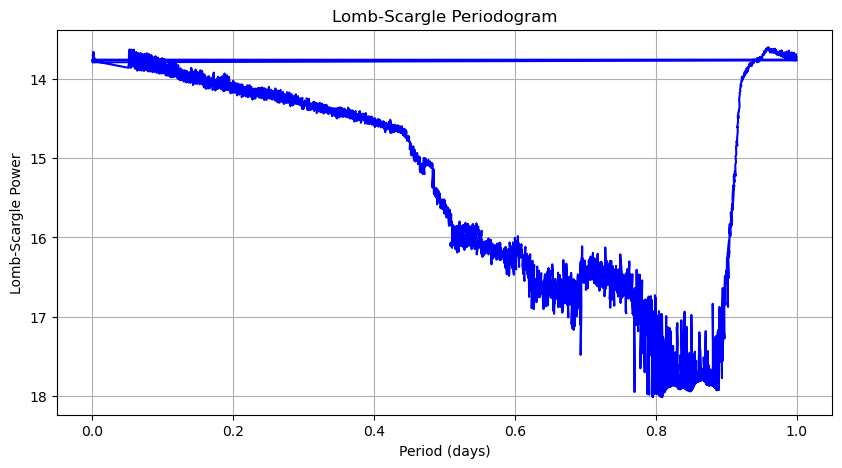

Best period: 0.17 hours


In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks


def analyze_txt_file(file_path):
    
    data = np.loadtxt(file_path)

    
    time = data[:, 1]  
    magnitude = data[:, 4] 

    ls = LombScargle(time, magnitude)
    frequency, power = ls.autopower(nyquist_factor=500, minimum_frequency=0.2)

    period_days = 1. / frequency
    period_hours = period_days * 24
    best_period = period_days[np.argmax(power)]

    phase = (time / best_period) % 1

    print("Best period: {0:.2f} hours".format(24 * best_period))

    plt.figure(figsize=(10, 5))
    plt.plot(period_days, power, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.xlim (0,0.01)
   
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)

    plt.figure(figsize=(10, 5))
    plt.plot(phase, magnitude, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (days)')
    plt.ylabel('Lomb-Scargle Power')
    plt.gca().invert_yaxis()
   
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)
    plt.show()

    print("Best period: {0:.2f} hours".format(24 * best_period))


file_path = r"c:\Users\eitan\code repos\data\extracted tarballs\sector54\lc_2022pix_cleaned.txt"

if os.path.exists(file_path):
    analyze_txt_file(file_path) 
    

In [3]:
def testls():
    x = np.linspace(0, 2 * np.pi, 1000)
    y = np.sin(x)
    plt.figure(figsize=(10, 5))
    plt.plot(x, y, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (hours)')
    plt.ylabel('Lomb-Scargle Power')
    plt.xlim(0, 650)  
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)
    plt.show()
    
    time = data[:, 1]  
    magnitude = data[:, 4] 

    ls = LombScargle(time, magnitude)

    cadence = 0.5

    try:
        cadence_hours = float(cadence)
        if cadence_hours <= 0:
            raise ValueError("Invalid cadence value. Cadence must be greater than 0.")
    except ValueError:
        print("Invalid input for cadence. Please enter a valid numeric value.")
        return

    max_frequency = 1 / cadence_hours
    frequency = np.linspace(0.01, max_frequency, 10000)
    power = ls.power(frequency, normalization='standard')  
    period = 24 / frequency  
    print(period)
   
    plt.figure(figsize=(10, 5))
    plt.plot(period, power, color='blue', label='Lomb-Scargle Periodogram')
    plt.xlabel('Period (hours)')
    plt.ylabel('Lomb-Scargle Power')
    plt.xlim(0, 650)  
    plt.title('Lomb-Scargle Periodogram')
    plt.grid(True)
    
    
    peaks, _ = find_peaks(power, height=0)
    print("Significant peaks:")
    for peak_index in peaks:
     peak_period = period[peak_index]
    peak_power = power[peak_index]
    print(f"Period: {peak_period:.2f} hours, Power: {peak_power:.2f}")

    peaks, _ = find_peaks(power, height=0)
    plt.plot(period[peaks], power[peaks], 'ro', markersize=5, label='Significant Peaks')
    
    for peak_index in peaks:
        plt.plot([period[peak_index], period[peak_index]], [0, power[peak_index]], 'r--', linewidth=1)

    plt.legend()  
    plt.show()


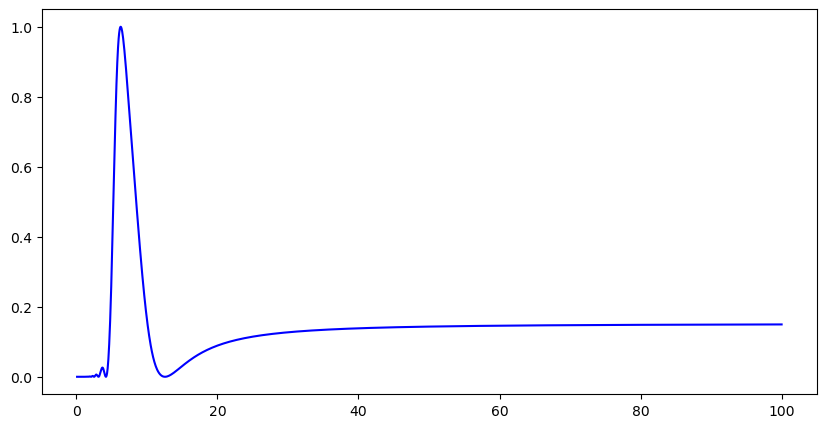

In [29]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks

x = np.linspace(0, 4 * np.pi, 1000)
y = np.sin(x)


ls = LombScargle(x, y)
frequency = np.linspace(0.01, 10, 20000)
power = ls.power(frequency, normalization='standard')
period = 1/frequency
plt.figure(figsize=(10, 5))
plt.plot(period, power, color='blue', label='Lomb-Scargle Periodogram')
plt.show()


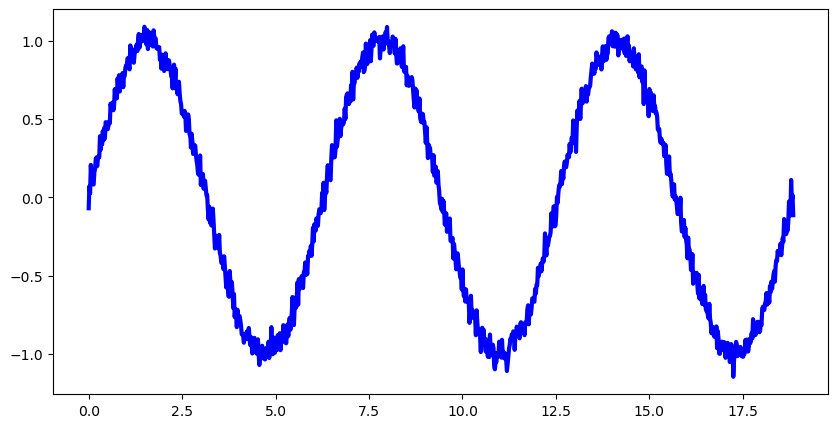

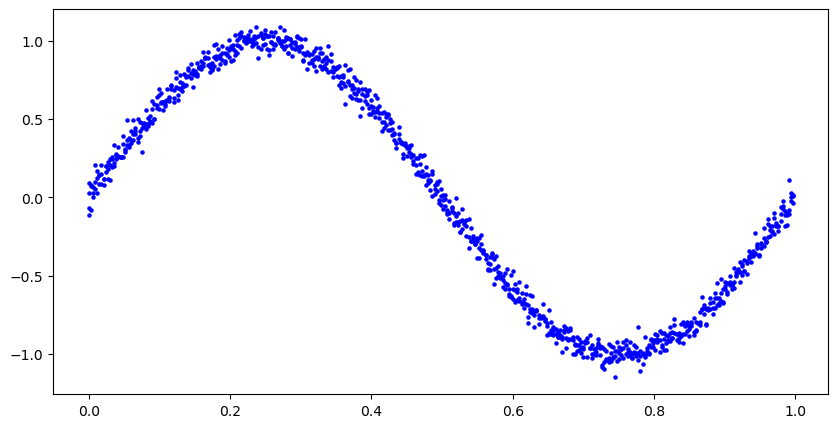

In [27]:
import os
import numpy as np
import matplotlib.pyplot as plt
from astropy.timeseries import LombScargle
from scipy.signal import find_peaks

x = np.linspace(0, 6 * np.pi, 1000)
y = np.sin(x)
y_noise = y + 0.05*np.random.normal(size=x.size)

plt.figure(figsize=(10, 5))
plt.plot(x, y_noise, color='blue', label='Lomb-Scargle Periodogram', linewidth=3)

period = 2*np.pi
phase = (x%period) / period

id = np.argsort(phase)
phase = phase[id]
y_noise_new = y_noise[id]


plt.figure(figsize=(10, 5))
plt.scatter(phase, y_noise_new, color='blue', label='Lomb-Scargle Periodogram', s=5)

plt.show()
